In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [150]:
# Load the dataset, skipping the first row
df = pd.read_csv("ILINet.csv", skiprows=1)

# Display the first few rows to check
print(df.head())
print(df.info())

  REGION TYPE REGION  YEAR  WEEK  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  \
0    National      X  1997    40         1.10148          1.21686      179   
1    National      X  1997    41         1.20007          1.28064      199   
2    National      X  1997    42         1.37876          1.23906      228   
3    National      X  1997    43         1.19920          1.14473      188   
4    National      X  1997    44         1.65618          1.26112      217   

  AGE 25-49 AGE 25-64  AGE 5-24 AGE 50-64  AGE 65  ILITOTAL  \
0         X       157       205         X      29       570   
1         X       151       242         X      23       615   
2         X       153       266         X      34       681   
3         X       193       236         X      36       653   
4         X       162       280         X      41       700   

   NUM. OF PROVIDERS  TOTAL PATIENTS  
0                192           46842  
1                191           48023  
2                219           5496

## Cleaning Data

In [153]:
# Replace 'X' with NaN for columns that should be numeric
age_columns = ['AGE 25-49', 'AGE 25-64', 'AGE 50-64']
df[age_columns] = df[age_columns].replace('X', pd.NA)

# Convert the columns to numeric type
df[age_columns] = df[age_columns].apply(pd.to_numeric, errors='coerce')

In [155]:
print(df.head())
print(df.info())

  REGION TYPE REGION  YEAR  WEEK  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  \
0    National      X  1997    40         1.10148          1.21686      179   
1    National      X  1997    41         1.20007          1.28064      199   
2    National      X  1997    42         1.37876          1.23906      228   
3    National      X  1997    43         1.19920          1.14473      188   
4    National      X  1997    44         1.65618          1.26112      217   

   AGE 25-49  AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
0        NaN      157.0       205        NaN      29       570   
1        NaN      151.0       242        NaN      23       615   
2        NaN      153.0       266        NaN      34       681   
3        NaN      193.0       236        NaN      36       653   
4        NaN      162.0       280        NaN      41       700   

   NUM. OF PROVIDERS  TOTAL PATIENTS  
0                192           46842  
1                191           48023  
2                

## Handling Missing Data

In [158]:
# Impute missing values with the median for age columns
df[age_columns] = df[age_columns].fillna(df[age_columns].median())

## Removing duplicates

In [161]:
# Remove any duplicates
df.drop_duplicates(inplace=True)

## One-hot encoding categorical variable

In [164]:
# One-hot encode categorical variables
# categorical columns: REGION TYPE and REGION need to be converted into dummy variables for analysis
df = pd.get_dummies(df, columns=['REGION TYPE', 'REGION'], drop_first=True)

## Check that numeric columns are correct

In [167]:
# Ensure all numeric columns are correctly typed
numeric_columns = ['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 5-24', 'AGE 65', 'ILITOTAL', 
                   'NUM. OF PROVIDERS', 'TOTAL PATIENTS']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

## Scale numeric features for time series analysis

In [170]:
# For time series, we have to scale numeric features to help improve performance of models
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Recheck what data looks like now after cleaning

In [173]:
# Check for missing values and data types
df.isnull().sum()
df.dtypes

YEAR                   int64
WEEK                   int64
% WEIGHTED ILI       float64
%UNWEIGHTED ILI      float64
AGE 0-4              float64
AGE 25-49            float64
AGE 25-64            float64
AGE 5-24             float64
AGE 50-64            float64
AGE 65               float64
ILITOTAL             float64
NUM. OF PROVIDERS    float64
TOTAL PATIENTS       float64
dtype: object

# EDA

In [176]:
# Summary statistics
df.describe()

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
count,1434.000000,1434.000000,1.434000e+03,1.434000e+03,1.434000e+03,1434.000000,1434.000000,1.434000e+03,1434.000000,1.434000e+03,1434.000000,1.434000e+03,1.434000e+03
mean,2010.981172,26.601813,2.873883e-16,3.963976e-17,-3.963976e-17,5284.467922,815.976987,3.963976e-17,2157.482566,3.963976e-17,0.000000,7.927952e-17,7.927952e-17
std,7.944086,15.170941,1.000349e+00,1.000349e+00,1.000349e+00,7098.650290,949.909150,1.000349e+00,2920.216929,1.000349e+00,1.000349,1.000349e+00,1.000349e+00
min,1997.000000,1.000000,-1.285020e+00,-1.304401e+00,-7.771884e-01,0.000000,0.000000,-6.754791e-01,0.000000,-5.248460e-01,-0.667554,-1.464324e+00,-1.095919e+00
25%,2004.000000,13.000000,-6.378374e-01,-6.282843e-01,-6.369021e-01,2319.500000,607.000000,-5.654169e-01,912.250000,-4.612259e-01,-0.564297,-8.309457e-01,-8.097032e-01
50%,2011.000000,27.000000,-2.914145e-01,-2.984348e-01,-3.492754e-01,3264.500000,607.000000,-3.545480e-01,1359.500000,-3.566880e-01,-0.357468,-1.684975e-01,-2.388155e-01
75%,2018.000000,40.000000,3.277124e-01,3.360259e-01,1.947198e-01,4691.500000,607.000000,1.014883e-01,1965.750000,-1.669305e-02,0.086554,4.261203e-01,1.928944e-01
max,2025.000000,53.000000,3.987679e+00,4.205630e+00,6.195509e+00,59689.000000,9812.000000,7.324845e+00,26594.000000,8.412831e+00,7.349230,2.272519e+00,2.998617e+00


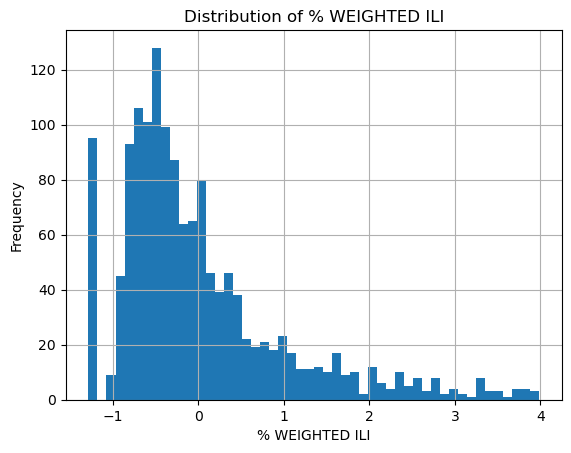

In [178]:
# Visualizing the distribution
df['% WEIGHTED ILI'].hist(bins=50)
plt.xlabel("% WEIGHTED ILI")
plt.ylabel("Frequency")
plt.title("Distribution of % WEIGHTED ILI")
plt.show()

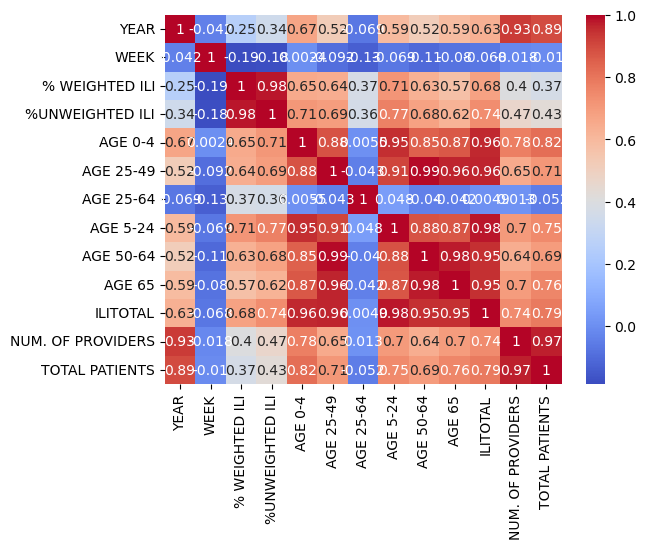

In [180]:
# Correlation analysis
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [184]:
# Compute the Pearson correlation matrix for numeric variables.
# Select numeric columns automatically
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix on these columns
corr_matrix = df[numeric_cols].corr()

# Print the correlation matrix
print("Pearson Correlation Matrix:")
print(corr_matrix)

Pearson Correlation Matrix:
                       YEAR      WEEK  % WEIGHTED ILI  %UNWEIGHTED ILI  \
YEAR               1.000000 -0.041984        0.254036         0.342566   
WEEK              -0.041984  1.000000       -0.186517        -0.178610   
% WEIGHTED ILI     0.254036 -0.186517        1.000000         0.980566   
%UNWEIGHTED ILI    0.342566 -0.178610        0.980566         1.000000   
AGE 0-4            0.668177  0.002378        0.651622         0.711277   
AGE 25-49          0.522450 -0.091907        0.642365         0.691835   
AGE 25-64         -0.068780 -0.134049        0.373476         0.360436   
AGE 5-24           0.592796 -0.068535        0.713542         0.770214   
AGE 50-64          0.517332 -0.107371        0.627790         0.676746   
AGE 65             0.590463 -0.079698        0.570449         0.621219   
ILITOTAL           0.632155 -0.068131        0.678982         0.738004   
NUM. OF PROVIDERS  0.927706 -0.017977        0.399657         0.466981   
TOTAL PATI

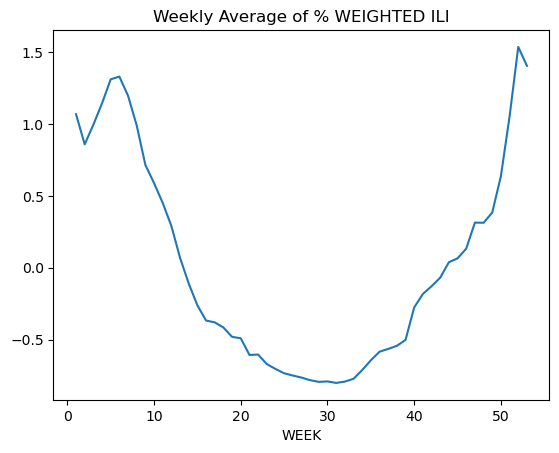

In [146]:
# Trend and Seasonal Analysis
df.groupby('WEEK')['% WEIGHTED ILI'].mean().plot()
plt.title('Weekly Average of % WEIGHTED ILI')
plt.show()

### What's this mean?
Helps us understand the weekly trend of flu activity. By plotting the average flu percentage for each week across all the years in your data, we can see:

- If there's any seasonal pattern (e.g., flu rates might be higher in the winter, which could show up as spikes in specific weeks).
- Whether flu activity is consistently high or low in certain weeks, helping to identify flu season trends.
- If there are any unusual weeks where flu rates spike or drop unexpectedly.

### Why is this useful?
- Spot seasonal peaks: It can help identify when flu season typically peaks each year. Here, activity picks up around the 32nd week of the year. 
- Make decisions: If you're planning health interventions or need to allocate resources, understanding when flu activity is highest can guide when to act.

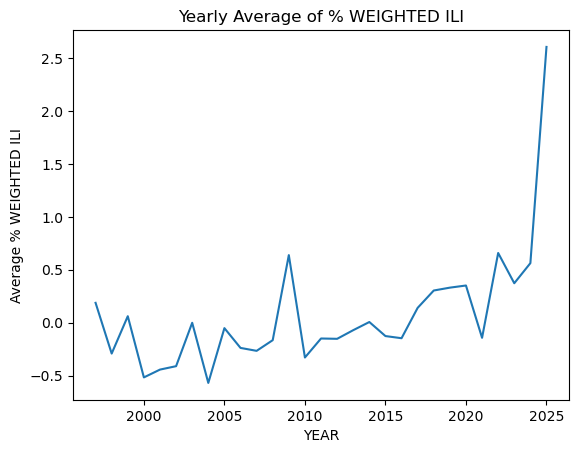

In [102]:
# Looking at yearly average to see how the flu percentage changes year over year to help give a better picture of year over year
# Group by YEAR to get the yearly average of % WEIGHTED ILI
df_yearly = df.groupby('YEAR')['% WEIGHTED ILI'].mean()

# Plot the yearly trend
df_yearly.plot()
plt.title('Yearly Average of % WEIGHTED ILI')
plt.ylabel('Average % WEIGHTED ILI')
plt.show()

### 
The worst flu season from this visual has been in 2024!

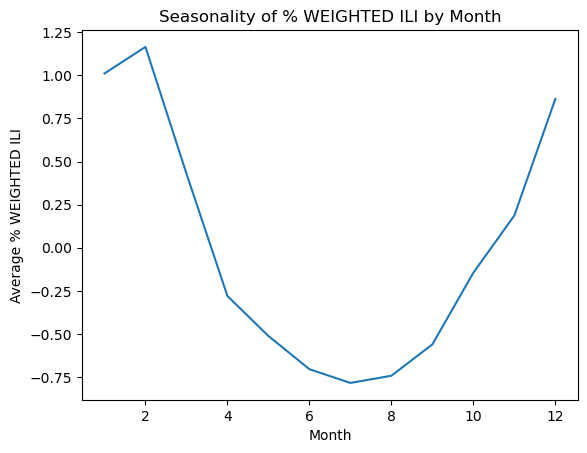

In [106]:
# Looking at seasons through the year by aggregating by month and plotting the rolling yearly average to capture seasonal fluctuations
# First, create a 'date' column by combining 'YEAR' and 'WEEK' columns
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + df['WEEK'].astype(str) + '0', format='%Y%U%w')

# Now, extract the month from the 'DATE' column
df['Month'] = df['DATE'].dt.month

# Group by Month and calculate the average flu rate for each month
df_monthly = df.groupby('Month')['% WEIGHTED ILI'].mean()

# Plot the seasonal trend by month
df_monthly.plot()
plt.title('Seasonality of % WEIGHTED ILI by Month')
plt.xlabel('Month')
plt.ylabel('Average % WEIGHTED ILI')
plt.show()

###
We can see here that in January, flu activity is still very high, highest in comparison to the other months. We also see that flu activity picks up in October and increases until December. 